In [273]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import pydot

In [274]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [275]:
# Importing the data set of Adult Census Income from Kaggle
adults = pd.read_csv('adult.csv',na_values="?")
# Identify missing values as na_values - as this data had '?' as missing value treating that as same
adults_test = pd.read_csv('adult.csv',na_values="?")
adults.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [276]:
print(adults.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [277]:
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [278]:
adults["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [279]:
adults.fillna({"workclass": "Private"},inplace=True)

In [280]:
adults["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [281]:
adults.fillna({"occupation": "Prof-specialty"},inplace=True)

In [282]:
adults["native.country"].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [283]:
adults.fillna({"native.country": "United-States"},inplace=True)

In [284]:

train_data = adults.drop('income',axis=1)
test_data = adults_test.drop('income',axis=1)

data = train_data.append(test_data)
incomegroup = adults['income'].append(adults_test['income'])

In [285]:
obj_cols = list(adults.select_dtypes(include=['object']).columns.values)
print(obj_cols)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [286]:
print(adults.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [287]:
# Encoding object type to numeric type
le = LabelEncoder()
for i in obj_cols:
    adults[i] = le.fit_transform(adults[i])

In [288]:
print(adults.head(5))

   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18              38       0  
2              40   

In [293]:
%%capture
# gather features
Y = adults['income']


In [294]:
print(Y)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
32531    0
32532    0
32533    1
32534    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32541    1
32542    0
32543    0
32544    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


In [295]:
adults = adults.drop(['income'], axis = 1)
features = "+".join(adults.columns)

In [296]:
adults['income'] = Y

In [298]:
print(adults['income'])

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
32531    0
32532    0
32533    1
32534    0
32535    1
32536    1
32537    0
32538    0
32539    1
32540    0
32541    1
32542    0
32543    0
32544    0
32545    0
32546    0
32547    1
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    0
32555    1
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


In [ ]:
print(features)

In [301]:

# get y and X dataframes based on this regression:
y, X = dmatrices('income ~' + features, adults, return_type='dataframe')


PatsyError: Error evaluating factor: AttributeError: 'Series' object has no attribute 'num'
    income ~age+workclass+fnlwgt+education+education.num+marital.status+occupation+relationship+race+sex+capital.gain+capital.loss+hours.per.week+native.country
                                           ^^^^^^^^^^^^^

In [ ]:

#correlation of features with dependent field
adults['income'] = le.fit_transform(adults['income'])
corr_matrix = adults.corr()
corr_matrix['income'].sort_values(ascending=False)

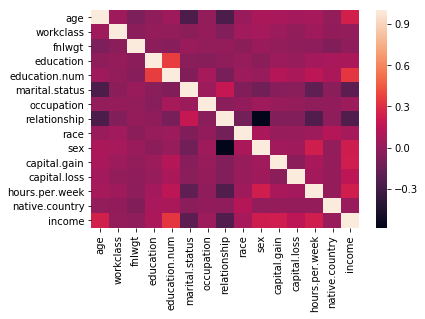

In [193]:
# Create Heatmap
sns.heatmap(corr_matrix)

In [195]:
# Feature extraction
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

NameError: name 'X' is not defined